### Download training dataset

In [1]:
from torchvision.datasets import MNIST

dataset = MNIST(root='data/', download=True)

In [2]:
len(dataset)

60000

### Download test dataset

In [3]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

View sample in training dataset

In [4]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

Display some of the dataset

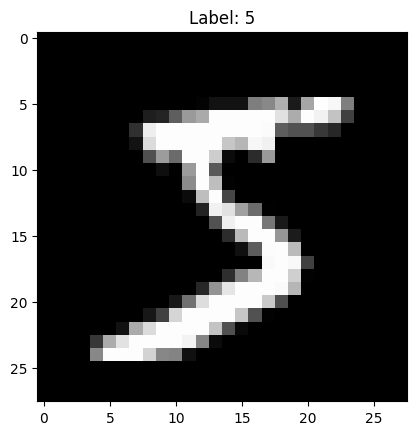

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

image, label = dataset[0]
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.show()

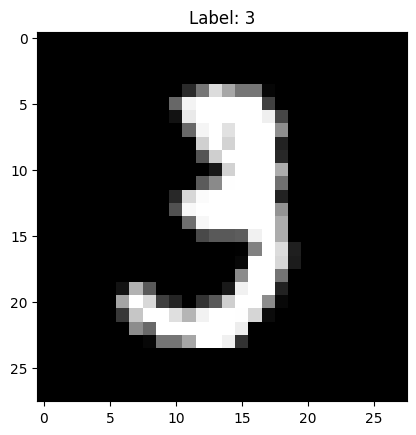

In [6]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.show()

### Convert image into tensor using `transforms` function

In [7]:
import torchvision.transforms as transforms

dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor())

In [8]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [9]:
import torch

print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


Display part of the image

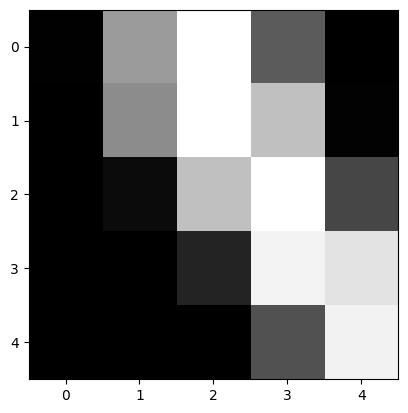

In [10]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')
plt.show()

## Set training, validation and test set

In [11]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds), len(test_dataset)

(50000, 10000, 10000)

Create data loader with batch

In [12]:
from torch.utils.data import DataLoader

batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

# Logistic Regression

Because the input are image with dimension 28x28, we need to convert into one dimensional array or vector

In [13]:
from torch import nn

input_size = 28*28
num_classes = 10

model = nn.Linear(input_size, num_classes)

In [14]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0217, -0.0117, -0.0296,  ...,  0.0243, -0.0355, -0.0110],
        [ 0.0186, -0.0100, -0.0120,  ..., -0.0061, -0.0288, -0.0143],
        [ 0.0072, -0.0012, -0.0034,  ..., -0.0009, -0.0166, -0.0333],
        ...,
        [ 0.0280,  0.0051, -0.0201,  ...,  0.0165,  0.0143,  0.0049],
        [ 0.0111,  0.0147, -0.0135,  ...,  0.0179, -0.0008,  0.0181],
        [ 0.0287, -0.0106, -0.0260,  ..., -0.0086, -0.0257, -0.0312]],
       requires_grad=True)

In [15]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0041,  0.0316, -0.0078,  0.0030,  0.0322,  0.0159,  0.0343,  0.0052,
        -0.0287, -0.0233], requires_grad=True)

In [16]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images.reshape(-1, 28*28))
    print(outputs)
    break

tensor([7, 0, 1, 3, 9, 4, 0, 5, 6, 9, 4, 2, 5, 6, 3, 1, 9, 7, 3, 8, 4, 8, 8, 4,
        3, 5, 1, 8, 8, 7, 8, 1, 9, 3, 6, 1, 2, 9, 8, 2, 8, 3, 0, 0, 6, 2, 3, 5,
        0, 4, 2, 5, 5, 3, 1, 8, 3, 2, 8, 6, 0, 4, 3, 8, 8, 2, 0, 1, 8, 2, 8, 0,
        0, 0, 0, 1, 3, 4, 1, 3, 3, 5, 7, 7, 9, 7, 4, 6, 1, 8, 2, 0, 8, 6, 8, 8,
        4, 6, 0, 6, 9, 3, 6, 9, 6, 9, 6, 3, 1, 6, 1, 8, 2, 7, 3, 9, 9, 3, 0, 0,
        0, 9, 0, 8, 2, 6, 5, 2])
torch.Size([128, 1, 28, 28])
tensor([[ 1.7332e-01, -1.3061e-01,  1.2095e-01,  ...,  1.4012e-01,
         -2.5444e-01, -1.0433e-01],
        [ 2.0166e-01, -3.0506e-01,  3.1968e-01,  ...,  1.3995e-01,
         -1.3702e-01, -2.1817e-01],
        [-7.8554e-02, -1.2321e-02,  8.8189e-02,  ..., -2.9982e-02,
         -3.0383e-01,  5.0387e-02],
        ...,
        [ 2.3896e-01,  1.5916e-01,  1.3530e-01,  ..., -1.0271e-01,
         -1.8020e-01, -1.4371e-01],
        [-9.1573e-02, -1.6938e-04,  1.4006e-01,  ..., -2.4375e-02,
         -1.9331e-02,  8.0266e-02],
        [-

In [17]:
class MNISTModel(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        x = x.reshape(-1, 784)
        out = self.linear(x)
        return out

model = MNISTModel()

In [18]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0317, -0.0227, -0.0050,  ..., -0.0221,  0.0014, -0.0089],
         [ 0.0336,  0.0290,  0.0042,  ..., -0.0220, -0.0127,  0.0026],
         [-0.0174,  0.0263,  0.0192,  ..., -0.0295,  0.0309, -0.0328],
         ...,
         [ 0.0315, -0.0217,  0.0326,  ...,  0.0339, -0.0168,  0.0184],
         [-0.0117,  0.0016,  0.0284,  ..., -0.0007, -0.0061, -0.0059],
         [-0.0267, -0.0239, -0.0294,  ...,  0.0333, -0.0156,  0.0238]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0264,  0.0073,  0.0108,  0.0245, -0.0042,  0.0181, -0.0060,  0.0022,
         -0.0011,  0.0094], requires_grad=True)]

### Evaluation metrics and loss function

In [19]:
from torch.nn import functional as F

probs = F.softmax(outputs, dim=1)
print("Sample probabilities:\n", probs[:2].data)
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1166, 0.0860, 0.1106, 0.0994, 0.0916, 0.1047, 0.1139, 0.1128, 0.0760,
         0.0883],
        [0.1309, 0.0789, 0.1474, 0.0793, 0.0810, 0.0922, 0.0878, 0.1231, 0.0933,
         0.0861]])
Sum:  1.0


In [20]:
import torch

max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([0, 2, 6, 2, 0, 9, 2, 0, 0, 3, 3, 5, 0, 0, 7, 1, 2, 0, 6, 0, 0, 5, 2, 3,
        0, 7, 1, 6, 6, 6, 6, 6, 3, 2, 0, 5, 5, 0, 6, 4, 0, 5, 5, 0, 2, 5, 7, 7,
        2, 4, 2, 0, 2, 7, 0, 5, 2, 7, 0, 2, 2, 2, 2, 2, 5, 4, 2, 6, 2, 4, 0, 5,
        7, 2, 5, 5, 2, 0, 6, 6, 2, 0, 0, 2, 2, 0, 3, 5, 6, 6, 0, 2, 0, 5, 5, 1,
        0, 2, 5, 1, 0, 7, 0, 3, 4, 2, 2, 0, 6, 2, 5, 9, 2, 0, 0, 0, 0, 2, 2, 2,
        7, 0, 2, 7, 4, 0, 5, 7])
tensor([0.1166, 0.1474, 0.1388, 0.1831, 0.1531, 0.1410, 0.1312, 0.1271, 0.1280,
        0.1175, 0.1314, 0.1224, 0.1238, 0.1357, 0.1392, 0.1126, 0.1457, 0.1149,
        0.1743, 0.1307, 0.1257, 0.1353, 0.1325, 0.1323, 0.1285, 0.1338, 0.1120,
        0.1347, 0.1399, 0.1357, 0.1412, 0.1211, 0.1278, 0.1364, 0.1382, 0.1127,
        0.1231, 0.1446, 0.1297, 0.1392, 0.1234, 0.1328, 0.1224, 0.1259, 0.1404,
        0.1360, 0.1378, 0.1340, 0.1661, 0.1354, 0.1711, 0.1482, 0.1579, 0.1280,
        0.1152, 0.1273, 0.1478, 0.1359, 0.1438, 0.1450, 0.1530, 0.1141, 0.1264,
       

In [21]:
def accuracy(y_pred, y_true):
    _, preds = torch.max(y_pred, dim=1)
    return torch.tensor(torch.sum(preds == y_true).item() / len(preds))

In [22]:
accuracy(outputs, labels)

tensor(0.0547)

In [23]:
loss_fn = F.cross_entropy
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3375, grad_fn=<NllLossBackward0>)


# Training loop

In [24]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = []

    for epoch in range(epochs):
        for batch in train_loader:
            # Calculate loss
            loss = model.training_step(batch)

            # Compute gradients
            loss.backward()

            # Update weights
            optimizer.step()

            # Reset gradients
            optimizer.zero_grad()

        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [25]:
class MNISTModel(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        x = x.reshape(-1, 784)
        out = self.linear(x)
        return out

    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch + 1, result['val_loss'], result['val_acc']))

model = MNISTModel()

In [26]:
result = evaluate(model, val_loader)
result

{'val_loss': 2.3187780380249023, 'val_acc': 0.10561709105968475}

In [27]:
history = fit(25, 1e-3, model, train_loader, val_loader)
history

Epoch [1], val_loss: 1.9468, val_acc: 0.6301
Epoch [2], val_loss: 1.6771, val_acc: 0.7206
Epoch [3], val_loss: 1.4759, val_acc: 0.7561
Epoch [4], val_loss: 1.3240, val_acc: 0.7790
Epoch [5], val_loss: 1.2073, val_acc: 0.7947
Epoch [6], val_loss: 1.1156, val_acc: 0.8053
Epoch [7], val_loss: 1.0420, val_acc: 0.8132
Epoch [8], val_loss: 0.9818, val_acc: 0.8195
Epoch [9], val_loss: 0.9317, val_acc: 0.8243
Epoch [10], val_loss: 0.8893, val_acc: 0.8289
Epoch [11], val_loss: 0.8531, val_acc: 0.8326
Epoch [12], val_loss: 0.8217, val_acc: 0.8356
Epoch [13], val_loss: 0.7942, val_acc: 0.8382
Epoch [14], val_loss: 0.7699, val_acc: 0.8408
Epoch [15], val_loss: 0.7483, val_acc: 0.8430
Epoch [16], val_loss: 0.7290, val_acc: 0.8455
Epoch [17], val_loss: 0.7115, val_acc: 0.8474
Epoch [18], val_loss: 0.6956, val_acc: 0.8486
Epoch [19], val_loss: 0.6811, val_acc: 0.8515
Epoch [20], val_loss: 0.6679, val_acc: 0.8527
Epoch [21], val_loss: 0.6557, val_acc: 0.8534
Epoch [22], val_loss: 0.6444, val_acc: 0.85

[{'val_loss': 1.9468122720718384, 'val_acc': 0.6301423907279968},
 {'val_loss': 1.6771354675292969, 'val_acc': 0.7206289768218994},
 {'val_loss': 1.4758659601211548, 'val_acc': 0.7561313509941101},
 {'val_loss': 1.3240289688110352, 'val_acc': 0.7789754867553711},
 {'val_loss': 1.2073110342025757, 'val_acc': 0.7946993708610535},
 {'val_loss': 1.1155749559402466, 'val_acc': 0.805280864238739},
 {'val_loss': 1.0420453548431396, 'val_acc': 0.8131922483444214},
 {'val_loss': 0.9818224310874939, 'val_acc': 0.8195213675498962},
 {'val_loss': 0.9316773414611816, 'val_acc': 0.8242682218551636},
 {'val_loss': 0.8893302083015442, 'val_acc': 0.8289161324501038},
 {'val_loss': 0.8530747890472412, 'val_acc': 0.8325751423835754},
 {'val_loss': 0.8216730356216431, 'val_acc': 0.8356408476829529},
 {'val_loss': 0.794192373752594, 'val_acc': 0.8382120132446289},
 {'val_loss': 0.7699238061904907, 'val_acc': 0.8407832384109497},
 {'val_loss': 0.7483288049697876, 'val_acc': 0.8429588675498962},
 {'val_loss'

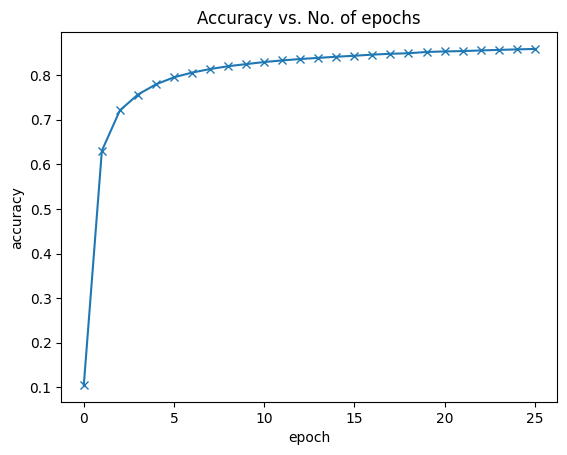

In [28]:
accuracies = [r['val_acc'] for r in [result] + history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')
plt.show()